In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from read_graph import read_ID_map, read_link_graph

TITLES_TO_IDS, IDS_TO_TILES = read_ID_map("data/ID_map.txt")
GRAPH = read_link_graph("data/link_graph_ids.txt")

Reading Graph: 100%|██████████| 16833643/16833643 [00:43<00:00, 386122.50it/s]


In [3]:
max_outlinks_ID = max(GRAPH, key=lambda p: len(GRAPH[p]))
print(IDS_TO_TILES[max_outlinks_ID], len(GRAPH[max_outlinks_ID]))


# dual_graph = 


inlinks_counts = {}
for p, links in GRAPH.items():
    for l in links:
        inlinks_counts[l] = inlinks_counts.get(l, 0) + 1

max_inlinks_ID = max(inlinks_counts, key=lambda p: inlinks_counts[p])
print(IDS_TO_TILES[max_inlinks_ID], inlinks_counts[max_inlinks_ID])

Index_of_Singapore-related_articles 12351
United_States 270266


In [4]:
num_links = np.array([len(links) for links in GRAPH.values()])
np.mean(num_links)

12.419457182960617

Text(0, 0.5, 'Frequency')

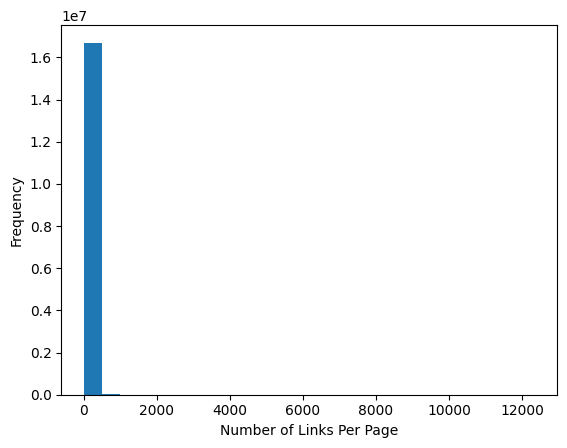

In [5]:
plt.hist(num_links, bins=25)

# plt.gca().set_yscale("log")

plt.gca().set_xlabel("Number of Links Per Page")
plt.gca().set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

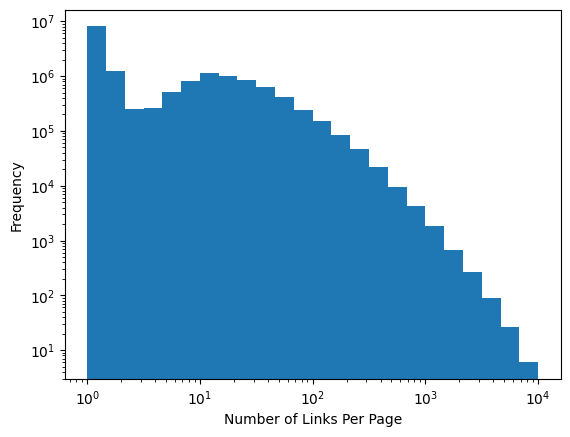

In [6]:
bins = np.logspace(0, 4, num=25)
plt.hist(num_links, bins=bins)

plt.gca().set_xscale("log")
plt.gca().set_yscale("log")

plt.gca().set_xlabel("Number of Links Per Page")
plt.gca().set_ylabel("Frequency")

In [7]:
import search

search.GRAPH = GRAPH
search.TITLES_TO_IDS = TITLES_TO_IDS
search.IDS_TO_TILES = IDS_TO_TILES

In [8]:
TITLES = list(TITLES_TO_IDS.keys())

In [9]:
import random
from tqdm import tqdm

with open("sampled_paths.txt", "a") as f:
    for _ in tqdm(range(1000), position=0):
        start, goal = random.choice(TITLES), random.choice(TITLES)
        # print(f"{start} -> ??? -> {goal}")

        path = search.shortest_path(start, goal, print_progress=False)

        if path is not None:
            # print(" -> ".join(path))
            f.write(f"{start} {goal}: " + " ".join(path) + "\n")
        else:
            # print("No path found.")
            f.write(f"{start} {goal}: NO_PATH_FOUND\n")
        
        # print()
        f.flush()


  2%|▎         | 25/1000 [14:17<9:17:13, 34.29s/it] 


KeyboardInterrupt: 

In [ ]:
paths = []
no_path_founds = []

with open("sampled_paths.txt") as f:
    for line in f.readlines():
        prompt, _, result = line.strip().partition(": ")
        start, end = prompt.split()
        if result == "NO_PATH_FOUND":
            no_path_founds.append((start, end))
        else:
            paths.append(tuple(result.split()))
    
from pprint import pprint

pprint(len(paths))
pprint(len(no_path_founds))

328
325


In [ ]:
longest_path = max(paths, key=lambda p: len(p) if "disambiguation" not in "".join(p) else -1)
print(" -> ".join(longest_path))
print(len(longest_path))

Linear_Inequality -> Linear_inequality -> Convex_set -> Crescent -> Switzerland -> Economy_of_Switzerland -> List_of_banks_in_Switzerland -> List_of_banks_(alphabetically) -> List_of_banks_(alphabetical) -> Metrocorp_Bancshares
10


(array([  6.,  37.,   0., 112.,   0., 109.,  49.,   0.,  12.,   3.]),
 array([ 4. ,  4.6,  5.2,  5.8,  6.4,  7. ,  7.6,  8.2,  8.8,  9.4, 10. ]),
 <BarContainer object of 10 artists>)

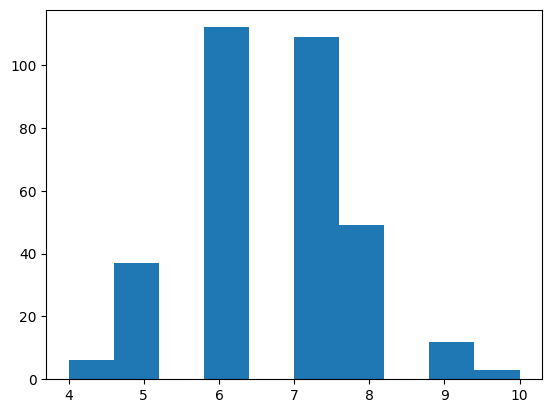

In [ ]:
path_lengths = [len(p) for p in paths]
plt.hist(path_lengths)